# Introduction to Embeddings with the OpenAI API - Part 1

## What are Embeddings?

Discover how embeddings models power many of the most exciting AI applications. Learn to use the OpenAI API to create embeddings and compute the semantic similarity between text.

In [3]:
import os

# Set your OpenAI API key
openai_api_key = os.environ['OPENAI_API_KEY']

### Creating embeddings
In this exercise, you'll create your very first embeddings using the OpenAI API. Normally, to interact with the OpenAI API, you would need an OpenAI API key, and creating embeddings would incur a cost. However, you do not need to create or provide an API key in this course.

The <OPENAI_API_TOKEN> placeholder has been provided in the code, which will send valid requests for the exercises in this course. If, at any point in the course, you hit a RateLimitError, pause for a moment and try again.

The OpenAI class from the openai library will be imported for you throughout the course, and after this exercise, the client will be created for you.

In [ ]:
from openai import OpenAI

# Create an OpenAI client
client = OpenAI(api_key=openai_api_key)

# Create a request to obtain embeddings
response = client.embeddings.create(model="text-embedding-3-small",
                                    input="Embeddings are a numerical representation of text")

# Convert the response into a dictionary
response_dict = response.model_dump()
print(response_dict)

{'data': [{'embedding': [0.00022078221081756055, -0.007320804055780172, 0.025236312299966812, 0.004777279682457447, 0.016767369583249092, -0.019154589623212814, 0.04742607846856117, -0.013777662999927998, -0.01383450161665678, 0.008701981045305729, 0.013175174593925476, -0.004967688582837582, 0.0005602148594334722, -0.035171691328287125, 0.025259047746658325, 0.0011793997837230563, -0.0027481436263769865, -0.020064005628228188, 0.018688512966036797, 0.05974867567420006, 0.005595754366368055, -0.027578061446547508, 0.009054379537701607, 0.026054788380861282, 0.01709703356027603, 0.02232617884874344, 0.001374782295897603, 0.007855086587369442, 0.038286443799734116, -0.010549233295023441, -0.039013974368572235, -0.023553892970085144, 0.022041987627744675, -0.01818833313882351, -0.013106968253850937, 0.020064005628228188, -0.019052280113101006, 0.03242070600390434, -0.0225194301456213, 0.039605095982551575, 0.030192634090781212, 0.037399761378765106, -0.06320445984601974, 0.011185824871063

### Digging into the embeddings response
You've been able to successfully use the OpenAI Embeddings endpoint to embed text data, and in this exercise, you'll finish this off by extracting information from the API's response.

You've been provided with a response from the Embeddings API, which has already been converted into a dictionary and stored as response_dict. You'll need to extract the desired information from this dictionary. This response_dict has been printed for you, so you can view its contents and structure.

Recall that the response is structured like a nested Python dictionary, and it can be accessed in much the same way.

In [6]:
# Extract the total_tokens from response_dict
print(response_dict['usage']['total_tokens'])

# Extract the embeddings from response_dict
print(response_dict['data'][0]['embedding'])

8
[0.00022078221081756055, -0.007320804055780172, 0.025236312299966812, 0.004777279682457447, 0.016767369583249092, -0.019154589623212814, 0.04742607846856117, -0.013777662999927998, -0.01383450161665678, 0.008701981045305729, 0.013175174593925476, -0.004967688582837582, 0.0005602148594334722, -0.035171691328287125, 0.025259047746658325, 0.0011793997837230563, -0.0027481436263769865, -0.020064005628228188, 0.018688512966036797, 0.05974867567420006, 0.005595754366368055, -0.027578061446547508, 0.009054379537701607, 0.026054788380861282, 0.01709703356027603, 0.02232617884874344, 0.001374782295897603, 0.007855086587369442, 0.038286443799734116, -0.010549233295023441, -0.039013974368572235, -0.023553892970085144, 0.022041987627744675, -0.01818833313882351, -0.013106968253850937, 0.020064005628228188, -0.019052280113101006, 0.03242070600390434, -0.0225194301456213, 0.039605095982551575, 0.030192634090781212, 0.037399761378765106, -0.06320445984601974, 0.011185824871063232, -0.02612299472093

### Embedding product descriptions
You've been provided with a list of dictionaries called products, which contains product information for different products sold by an online retailer. It's your job to embed the 'short_description' for each product to enable semantic search for the retailer's website.

Here's a preview of the products list of dictionaries:

```
products = [
    {
        "title": "Smartphone X1",
        "short_description": "The latest flagship smartphone with AI-powered features and 5G connectivity.",
        "price": 799.99,
        "category": "Electronics",
        "features": [
            "6.5-inch AMOLED display",
            "Quad-camera system with 48MP main sensor",
            "Face recognition and fingerprint sensor",
            "Fast wireless charging"
        ]
    },
    ...
]
```
An OpenAI client has already been created as assigned to client.

In [4]:
import json
from openai import OpenAI

with open('products.json', 'r') as f:
    products = json.load(f)

# Extract a list of product short descriptions from products
product_descriptions = [product['short_description'] for product in products]

client = OpenAI(api_key=openai_api_key)

# Create embeddings for each product description
response = client.embeddings.create(model="text-embedding-3-small", 
                                    input=product_descriptions)
response_dict = response.model_dump()

# Extract the embeddings from response_dict and store in products
for i, product in enumerate(products):
    product['embedding'] = response_dict['data'][i]['embedding']
    
print(products[0].items())

dict_items([('title', 'Smartphone X1'), ('short_description', 'The latest flagship smartphone with AI-powered features and 5G connectivity.'), ('price', 799.99), ('category', 'Electronics'), ('features', ['6.5-inch AMOLED display', 'Quad-camera system with 48MP main sensor', 'Face recognition and fingerprint sensor', 'Fast wireless charging']), ('embedding', [0.01687963679432869, -0.012772045098245144, -0.02286987565457821, 0.021800190210342407, 0.013745458796620369, -0.0016473156865686178, 0.013670580461621284, 0.036968331784009933, 0.032133352011442184, -0.01257950160652399, -0.04060526192188263, -0.033203039318323135, -0.06602098792791367, -0.0637960433959961, -0.03129899874329567, -0.04753682389855385, -0.07539143413305283, 0.0026300891768187284, 0.06409555673599243, -0.011167516931891441, -0.025800814852118492, 0.003476477926596999, 0.029887013137340546, -0.014034274034202099, -0.001002830103971064, -0.029330777004361153, -0.0639244019985199, 0.02011008746922016, 0.017500054091215

### Visualizing the embedded descriptions
Now that you've created embeddings from the product descriptions, it's time to explore them! You'll use t-SNE to reduce the number of dimensions in the embeddings data from 1,536 to two, which will make the data much easier to visualize.

You'll start with the products list of dictionaries you worked with in the last exercise, containing product information and the embeddings you created from the 'short_description'. As a reminder, here's a preview of products:
```
products = [
    {
        "title": "Smartphone X1",
        "short_description": "The latest flagship smartphone with AI-powered features and 5G connectivity.",
        "price": 799.99,
        "category": "Electronics",
        "features": [
            "6.5-inch AMOLED display",
            "Quad-camera system with 48MP main sensor",
            "Face recognition and fingerprint sensor",
            "Fast wireless charging"
        ],
        "embedding": [-0.014650369994342327, ..., 0.008677126839756966]
    },
    ...
]
```
matplotlib.pyplot and numpy have been imported as plt and np, respectively.

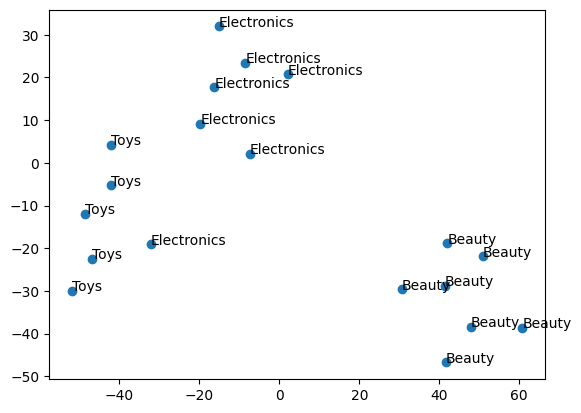

In [5]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Create categories and embeddings lists using list comprehensions
categories = [product['category'] for product in products]
embeddings = [product['embedding'] for product in products]

# Reduce the number of embeddings dimensions to two using t-SNE
tsne = TSNE(n_components=2, 
            perplexity=5)
embeddings_2d = tsne.fit_transform(np.array(embeddings))

# Create a scatter plot from embeddings_2d
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

for i, category in enumerate(categories):
    plt.annotate(category, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.show()

### More repeatable embeddings
As you continue to work with embeddings, you'll find yourself making repeated calls to OpenAI's embedding model. To make these calls in a more repeatable and modular way, it would be better to define a custom function called create_embeddings() that would output embeddings for any number of text inputs. In this exercise, you'll do just that!

In [7]:
short_description = 'The latest flagship smartphone with AI-powered features and 5G connectivity.'
list_of_descriptions = ['Charge your devices conveniently with this sleek wireless charging dock.',
                        'Elevate your skincare routine with this luxurious skincare set.']

# Define a create_embeddings function
def create_embeddings(texts):
  response = client.embeddings.create(
    model="text-embedding-3-small",
    input=texts
  )
  response_dict = response.model_dump()
  
  return [data['embedding'] for data in response_dict['data']]

# Embed short_description and print
print(create_embeddings(short_description)[0])

# Embed list_of_descriptions and print
print(create_embeddings(list_of_descriptions))

[0.01687963679432869, -0.012772045098245144, -0.02286987565457821, 0.021800190210342407, 0.013745458796620369, -0.0016473156865686178, 0.013670580461621284, 0.036968331784009933, 0.032133352011442184, -0.01257950160652399, -0.04060526192188263, -0.033203039318323135, -0.06602098792791367, -0.0637960433959961, -0.03129899874329567, -0.04753682389855385, -0.07539143413305283, 0.0026300891768187284, 0.06409555673599243, -0.011167516931891441, -0.025800814852118492, 0.003476477926596999, 0.029887013137340546, -0.014034274034202099, -0.001002830103971064, -0.029330777004361153, -0.0639244019985199, 0.02011008746922016, 0.017500054091215134, 0.01843068189918995, 0.0151039594784379, -0.04116149619221687, 0.037310630083084106, -0.01073429360985756, -0.02044169045984745, 0.0010696854442358017, 0.011509816162288189, -0.04058386757969856, -0.033866241574287415, 0.03470059856772423, 0.011531209573149681, 0.042231183499097824, 0.014676084741950035, 0.021703919395804405, -0.024067923426628113, 0.002

### Finding the most similar product
Being able to compute similarity between embeddings is a key step within embeddings applications. In this exercise, you'll return to the products list of dictionaries that you worked with previously, which contains the embedded short descriptions you also created earlier.

You'll compare a piece of text to these embedded descriptions to identify the most similar description.

numpy has been imported as np, and distance is available from scipy.spatial. A create_embeddings() function has already been defined for you and is available to use for creating embeddings from a single input.

In [8]:
from scipy.spatial import distance
import numpy as np

# Embed the search text
search_text = "soap"
search_embedding = create_embeddings(search_text)[0]

distances = []
for product in products:
  # Compute the cosine distance for each product description
  dist = distance.cosine(search_embedding, product['embedding'])
  distances.append(dist)

# Find and print the most similar product short_description    
min_dist_ind = np.argmin(distances)
print(products[min_dist_ind]['short_description'])

Pamper yourself or a loved one with this spa gift basket full of relaxation goodies.
